In [1]:
import mat73
import numpy as np

import tensorflow as tf

from imblearn.over_sampling import SMOTE

from imblearn.under_sampling import RandomUnderSampler

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import pickle

2022-12-13 18:50:01.409945: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_train =  mat73.loadmat('./data/X_train.mat')['X_train']
X_val =  mat73.loadmat('./data/X_val.mat')['X_val']
X_test =  mat73.loadmat('./data/X_test.mat')['X_test']

t_train =  tf.argmax(mat73.loadmat('./data/y_train.mat')['y_train'], axis=1).numpy()
t_val =  tf.argmax(mat73.loadmat('./data/y_val.mat')['y_val'], axis=1).numpy()
t_test =  tf.argmax(mat73.loadmat('./data/y_test.mat')['y_test'], axis=1).numpy()

2022-12-13 18:50:46.273337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 18:50:46.277855: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
# combine the training and validation data
X_train = np.concatenate((X_train, X_val), axis=0)
t_train = np.concatenate((t_train, t_val), axis=0)

In [4]:
unique, counts = np.unique(t_train, return_counts=True)
print(np.asarray((unique, counts)).T)

# sampleNum = 20000

# Balance the dataset
X_train, t_train = SMOTE().fit_resample(X_train, t_train)
# X_train, t_train = RandomUnderSampler(sampling_strategy={0: sampleNum, 1: sampleNum, 2: sampleNum, 3: sampleNum, 4: sampleNum, 5: sampleNum, 6: sampleNum}, random_state=42).fit_resample(X_train, t_train)

unique, counts = np.unique(t_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 19028]
 [    1 69123]
 [    2  9468]
 [    3  5747]
 [    4 26708]
 [    5 32780]
 [    6   160]]
[[    0 69123]
 [    1 69123]
 [    2 69123]
 [    3 69123]
 [    4 69123]
 [    5 69123]
 [    6 69123]]


In [5]:
X_train.shape

(483861, 6000)

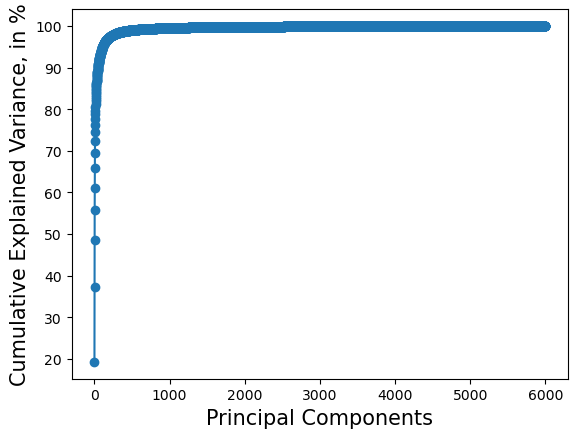

In [6]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)

plt.plot(100*np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Principal Components',size=15)
plt.ylabel('Cumulative Explained Variance, in %', size=15);

In [7]:
n_components = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.9)[0][0]
print(n_components)
np.cumsum(pca.explained_variance_ratio_)[n_components]

47


0.9005997011318614

In [8]:
pca = PCA(n_components=n_components)
pca.fit(X_train)

PCA(n_components=47)

In [9]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [10]:
# save the trained classifier to a file
with open('./models/PCA.pkl', 'wb') as f:
    pickle.dump(pca, f)

In [11]:
X_train.shape

(483861, 47)

In [12]:
np.save('./data_processed/X_train.npy', X_train)
np.save('./data_processed/X_test.npy', X_test)

np.save('./data_processed/t_train.npy', t_train)
np.save('./data_processed/t_test.npy', t_test)